In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=13)

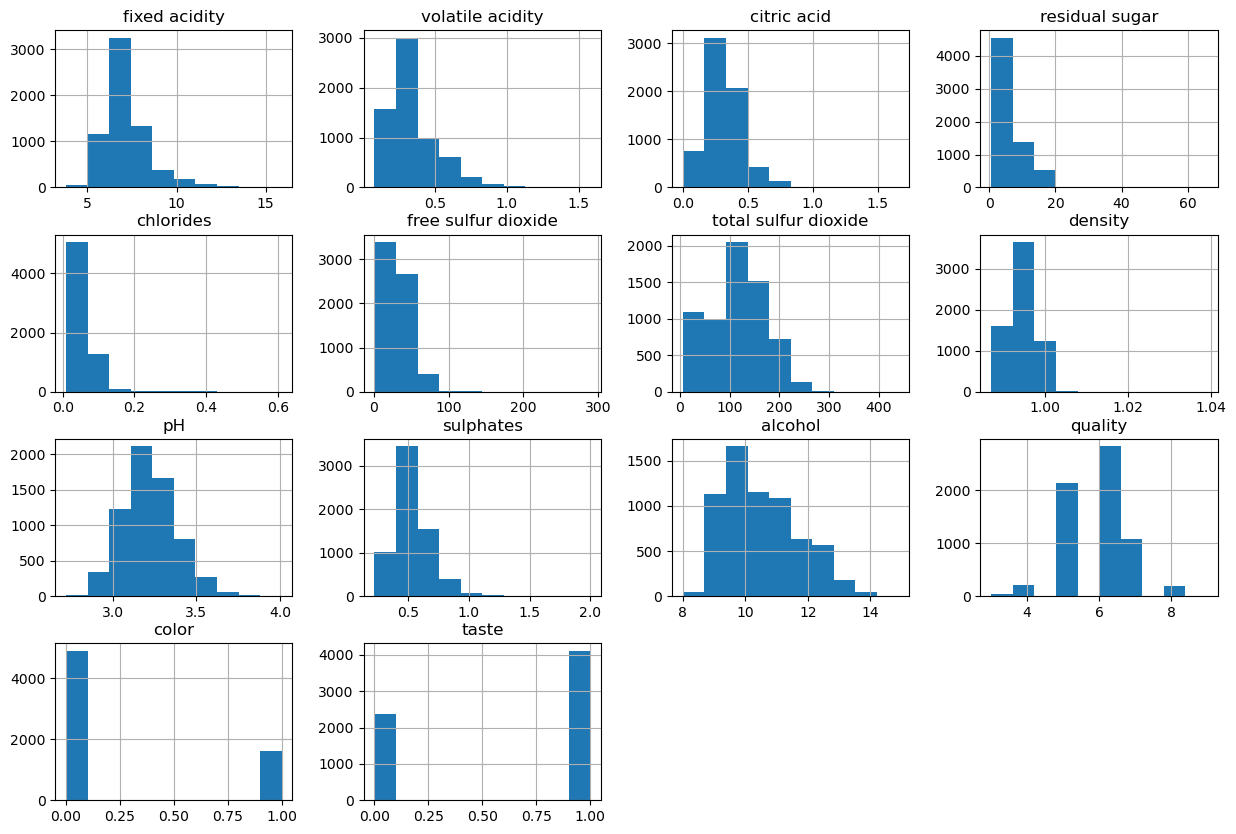

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(bins=10, figsize=(15,10))
plt.show()

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [7]:
column_name = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'
]

df_pivot_table = wine.pivot_table(column_name, ['quality'], aggfunc='median')
print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          10.15     0.0550         0.33  0.995900           7.45   
4          10.00     0.0505         0.26  0.994995           7.00   
5           9.60     0.0530         0.30  0.996100           7.10   
6          10.50     0.0460         0.31  0.994700           6.90   
7          11.40     0.0390         0.32  0.992400           6.90   
8          12.00     0.0370         0.32  0.991890           6.80   
9          12.50     0.0310         0.36  0.990300           7.10   

         free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                          
3                       17.0  3.245            3.15      0.505   
4                       15.0  3.220            2.20      0.485   
5                       27.0  3.190            3.00      0.500   
6                       29.0  3.210            3

In [8]:
corr_matrix = wine.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


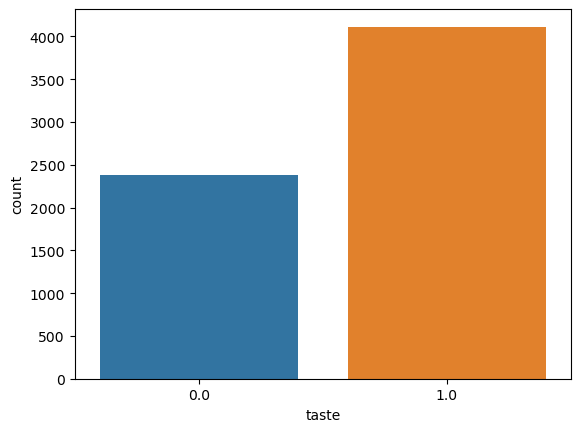

In [10]:
import seaborn as sns

sns.countplot(x=wine['taste'])
plt.show()

In [12]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [13]:
from sklearn.model_selection import KFold, cross_val_score, KFold

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8181578070630044 0.020283878951415715
DecisionTreeClassifier 0.7523556304138596 0.01399381447345489
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7665884356259718 0.021614689094861146
LogisticRegression 0.7371525875471978 0.01086833725751718


c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

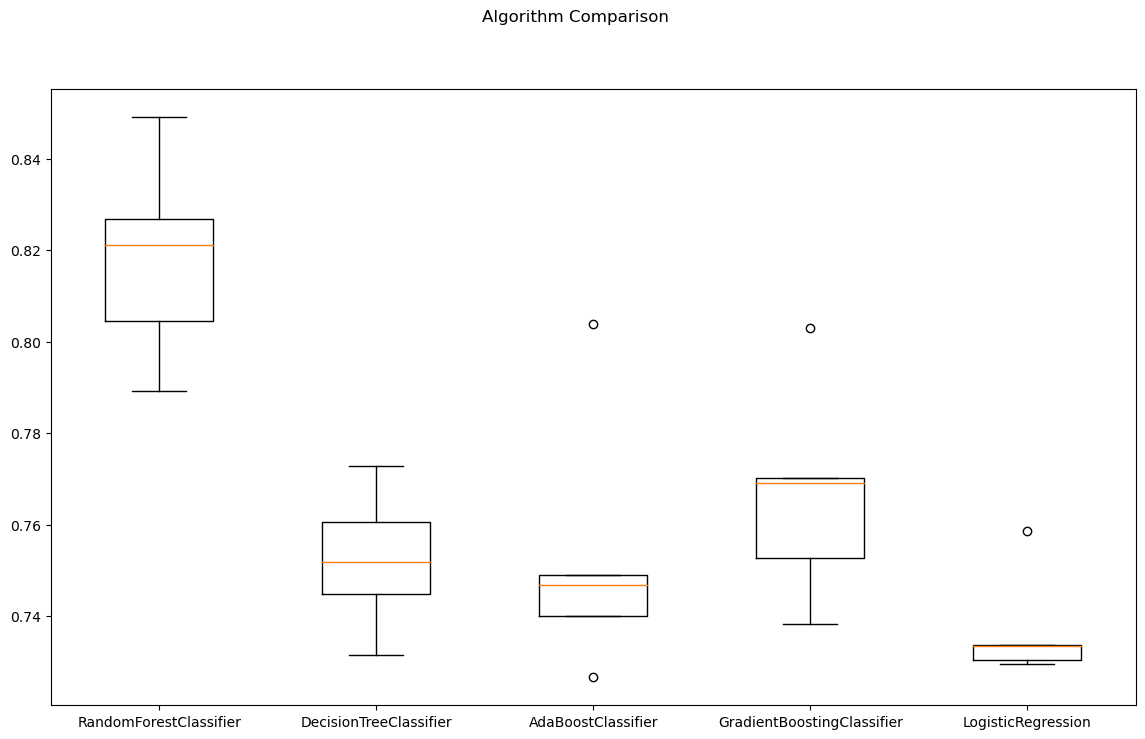

In [15]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [16]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

RandomForestClassifier 0.8353846153846154
DecisionTreeClassifier 0.78
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
LogisticRegression 0.7330769230769231


c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
